In [ ]:
!pip install yfinance


In [ ]:
import yfinance as yf, numpy as np, datetime as dt, pandas as pd, matplotlib.pyplot as plt
from scipy.stats import norm

In [ ]:
import yfinance as yf
tata = yf.download("COALINDIA.NS", start="2022-01-02")
print(tata)

[*********************100%%**********************]  1 of 1 completed

                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2022-01-03  147.250000  155.949997  147.000000  155.300003  126.573761   
2022-01-04  156.000000  156.649994  152.350006  153.000000  124.699203   
2022-01-05  153.000000  154.300003  152.100006  153.699997  125.269707   
2022-01-06  154.500000  155.250000  153.050003  154.649994  126.043983   
2022-01-07  155.000000  157.449997  154.949997  156.949997  127.918549   
...                ...         ...         ...         ...         ...   
2024-07-12  504.000000  508.600006  495.500000  496.200012  496.200012   
2024-07-15  500.000000  503.600006  492.549988  497.750000  497.750000   
2024-07-16  498.000000  518.400024  498.000000  512.450012  512.450012   
2024-07-18  515.349976  515.799988  501.250000  505.250000  505.250000   
2024-07-19  505.299988  506.399994  486.750000  488.000000  488.000000   

              Volume  
Date          

In [ ]:
sample_df=pd.read_csv('sample_portfolio 2.csv')
sample_df

,Ticker,Quantity,Buying Price
0,TATASTEEL.NS,10,130.10
1,TATAMOTORS.NS,24,800.45
2,RELIANCE.NS,7,2657.15
3,TCS.NS,23,3858.25
4,BHARTIARTL.NS,31,1158.00
5,INFY.NS,20,1642.15
6,MARUTI.NS,15,9860.45
7,IOC.NS,5,138.95
8,GRASIM.NS,13,2049.60
9,ITC.NS,33,459.30


In [ ]:
sample_df['total']=sample_df['Quantity']*sample_df['Buying Price']
sample_df

,Ticker,Quantity,Buying Price,total
0,TATASTEEL.NS,10,130.10,1301.00
1,TATAMOTORS.NS,24,800.45,19210.80
2,RELIANCE.NS,7,2657.15,18600.05
3,TCS.NS,23,3858.25,88739.75
4,BHARTIARTL.NS,31,1158.00,35898.00
5,INFY.NS,20,1642.15,32843.00
6,MARUTI.NS,15,9860.45,147906.75
7,IOC.NS,5,138.95,694.75
8,GRASIM.NS,13,2049.60,26644.80
9,ITC.NS,33,459.30,15156.90


In [ ]:
total_amt_invested=sample_df['total'].sum()
total_amt_invested

724160.4

In [ ]:
sample_df['weights']=sample_df['total']/total_amt_invested
sample_df

,Ticker,Quantity,Buying Price,total,weights
0,TATASTEEL.NS,10,130.10,1301.00,0.001797
1,TATAMOTORS.NS,24,800.45,19210.80,0.026528
2,RELIANCE.NS,7,2657.15,18600.05,0.025685
3,TCS.NS,23,3858.25,88739.75,0.122542
4,BHARTIARTL.NS,31,1158.00,35898.00,0.049572
5,INFY.NS,20,1642.15,32843.00,0.045353
6,MARUTI.NS,15,9860.45,147906.75,0.204246
7,IOC.NS,5,138.95,694.75,0.000959
8,GRASIM.NS,13,2049.60,26644.80,0.036794
9,ITC.NS,33,459.30,15156.90,0.020930


In [ ]:
weights_arr=sample_df['weights'].to_numpy()
weights_arr

array([1.79656330e-03, 2.65283769e-02, 2.56849864e-02, 1.22541567e-01,
       4.95718904e-02, 4.53532118e-02, 2.04245841e-01, 9.59386898e-04,
       3.67940583e-02, 2.09303077e-02, 1.13893137e-01, 2.28700713e-02,
       2.84165083e-01, 1.96464761e-02, 5.25739878e-03, 2.14524296e-03,
       1.69184893e-02, 5.18255348e-04, 1.79656330e-04])

In [ ]:
tickers_arr=sample_df['Ticker'].to_numpy()
tickers_arr

array(['TATASTEEL.NS', 'TATAMOTORS.NS', 'RELIANCE.NS', 'TCS.NS',
       'BHARTIARTL.NS', 'INFY.NS', 'MARUTI.NS', 'IOC.NS', 'GRASIM.NS',
       'ITC.NS', 'ASIANPAINT.NS', 'ADANIPOWER.NS', 'BAJAJ-AUTO.NS',
       'JSWSTEEL.NS', 'POWERGRID.NS', 'HINDZINC.NS', 'SIEMENS.NS',
       'COALINDIA.NS', 'ZOMATO.NS'], dtype=object)

In [ ]:
tickers=tickers_arr.tolist()
weights=weights_arr


In [ ]:
start=dt.datetime(2019,1,1)
end=dt.datetime.now();

df=yf.download(tickers,start,end)['Adj Close']
print(df)

[*********************100%%**********************]  19 of 19 completed

Ticker      ADANIPOWER.NS  ASIANPAINT.NS  BAJAJ-AUTO.NS  BHARTIARTL.NS  \
Date                                                                     
2019-01-01      50.849998    1311.242310    2288.534424     284.345551   
2019-01-02      50.549999    1322.475586    2259.452148     278.249298   
2019-01-03      50.349998    1327.256104    2267.299805     279.005798   
2019-01-04      50.049999    1324.913574    2294.871094     286.970978   
2019-01-07      50.349998    1334.617432    2231.376709     289.195923   
...                   ...            ...            ...            ...   
2024-07-12     709.950012    2999.149902    9430.750000    1433.250000   
2024-07-15     708.549988    2956.500000    9673.349609    1437.599976   
2024-07-16     712.450012    2974.449951    9718.349609    1466.500000   
2024-07-18     699.500000    2931.550049    9626.200195    1483.650024   
2024-07-19     694.500000    2946.050049    9386.049805    1461.750000   

Ticker      COALINDIA.NS    GRASIM.NS

In [ ]:
returns=df.pct_change()

In [ ]:
returns

Ticker,ADANIPOWER.NS,ASIANPAINT.NS,BAJAJ-AUTO.NS,BHARTIARTL.NS,COALINDIA.NS,GRASIM.NS,HINDZINC.NS,INFY.NS,IOC.NS,ITC.NS,JSWSTEEL.NS,MARUTI.NS,POWERGRID.NS,RELIANCE.NS,SIEMENS.NS,TATAMOTORS.NS,TATASTEEL.NS,TCS.NS,ZOMATO.NS
Date,,,,,,,,,,,,,,,,,,,
2019-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-02,-0.005900,0.008567,-0.012708,-0.021440,-0.019876,-0.021596,-0.018355,0.006015,-0.003268,-0.007428,-0.050173,-0.027946,-0.023750,-0.013024,-0.005741,-0.028250,-0.042850,0.010774,NaN
2019-01-03,-0.003956,0.003615,0.003473,0.002719,-0.007182,-0.019375,-0.011916,0.000149,-0.033515,-0.006237,-0.020956,-0.008792,-0.011268,-0.012337,-0.011026,-0.014832,-0.025119,-0.012141,NaN
2019-01-04,-0.005958,-0.001765,0.012160,0.028548,0.006383,0.008066,0.008163,-0.012105,0.009800,0.007531,0.018751,0.004241,0.014763,0.005399,0.017035,0.029509,0.013299,-0.012158,NaN
2019-01-07,0.005994,0.007324,-0.027668,0.007753,-0.008457,0.017987,0.010489,0.016111,-0.003733,0.002491,0.006598,0.017631,0.013017,0.005552,-0.000612,0.025739,-0.004409,0.011216,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-07-12,-0.014916,-0.007578,-0.003808,-0.003269,-0.007699,0.015045,-0.010348,0.035729,-0.002389,0.000872,0.010162,-0.012009,0.000875,0.010170,-0.020891,-0.003967,-0.001362,0.066328,0.024546
2024-07-15,-0.001972,-0.014221,0.025724,0.003035,0.003124,-0.014066,-0.007448,-0.002746,0.015924,0.009476,-0.002890,0.006484,0.002186,0.000313,0.003448,0.007573,-0.011441,-0.003525,0.030026
2024-07-16,0.005504,0.006071,0.004652,0.020103,0.029533,0.008417,0.003638,0.011130,0.006129,0.004640,0.002844,-0.000348,-0.004072,-0.013132,-0.022409,-0.003221,0.001859,0.002219,-0.050884


In [ ]:
# variance and covariance matrix
cov_matrix=returns.cov()
print(cov_matrix.shape[0],'x',cov_matrix.shape[1])
cov_matrix

19 x 19


Ticker,ADANIPOWER.NS,ASIANPAINT.NS,BAJAJ-AUTO.NS,BHARTIARTL.NS,COALINDIA.NS,GRASIM.NS,HINDZINC.NS,INFY.NS,IOC.NS,ITC.NS,JSWSTEEL.NS,MARUTI.NS,POWERGRID.NS,RELIANCE.NS,SIEMENS.NS,TATAMOTORS.NS,TATASTEEL.NS,TCS.NS,ZOMATO.NS
Ticker,,,,,,,,,,,,,,,,,,,
ADANIPOWER.NS,0.001279,0.000108,0.000152,0.000163,0.000207,0.000221,0.000195,0.000112,0.000202,0.000130,0.000259,0.000214,0.000155,0.000187,0.000206,0.000356,0.000218,0.000107,0.000218
ASIANPAINT.NS,0.000108,0.000264,0.000082,0.000074,0.000049,0.000121,0.000075,0.000077,0.000075,0.000061,0.000111,0.000133,0.000047,0.000105,0.000102,0.000115,0.000083,0.000070,0.000078
BAJAJ-AUTO.NS,0.000152,0.000082,0.000277,0.000099,0.000079,0.000130,0.000073,0.000062,0.000095,0.000074,0.000132,0.000161,0.000070,0.000102,0.000109,0.000184,0.000108,0.000064,0.000059
BHARTIARTL.NS,0.000163,0.000074,0.000099,0.000363,0.000080,0.000166,0.000068,0.000086,0.000079,0.000079,0.000157,0.000117,0.000082,0.000106,0.000110,0.000160,0.000112,0.000068,0.000070
COALINDIA.NS,0.000207,0.000049,0.000079,0.000080,0.000420,0.000140,0.000153,0.000059,0.000207,0.000098,0.000201,0.000111,0.000137,0.000130,0.000137,0.000214,0.000195,0.000062,0.000126
GRASIM.NS,0.000221,0.000121,0.000130,0.000166,0.000140,0.000395,0.000142,0.000096,0.000146,0.000112,0.000253,0.000182,0.000113,0.000148,0.000173,0.000258,0.000223,0.000087,0.000147
HINDZINC.NS,0.000195,0.000075,0.000073,0.000068,0.000153,0.000142,0.000532,0.000062,0.000119,0.000072,0.000187,0.000094,0.000086,0.000103,0.000127,0.000202,0.000202,0.000056,0.000089
INFY.NS,0.000112,0.000077,0.000062,0.000086,0.000059,0.000096,0.000062,0.000315,0.000067,0.000059,0.000133,0.000084,0.000042,0.000103,0.000073,0.000139,0.000103,0.000177,0.000112
IOC.NS,0.000202,0.000075,0.000095,0.000079,0.000207,0.000146,0.000119,0.000067,0.000362,0.000102,0.000171,0.000115,0.000139,0.000124,0.000145,0.000210,0.000189,0.000071,0.000099


In [ ]:
avg_returns=returns.mean()
avg_returns

Ticker
ADANIPOWER.NS    0.002547
ASIANPAINT.NS    0.000724
BAJAJ-AUTO.NS    0.001171
BHARTIARTL.NS    0.001378
COALINDIA.NS     0.001084
GRASIM.NS        0.001092
HINDZINC.NS      0.001291
INFY.NS          0.000985
IOC.NS           0.000912
ITC.NS           0.000670
JSWSTEEL.NS      0.001117
MARUTI.NS        0.000598
POWERGRID.NS     0.001179
RELIANCE.NS      0.001003
SIEMENS.NS       0.001566
TATAMOTORS.NS    0.001701
TATASTEEL.NS     0.002023
TCS.NS           0.000806
ZOMATO.NS        0.001290
dtype: float64

In [ ]:
count=returns.count()[0]
count

1368

In [ ]:
port_mean=avg_returns @ weights
port_std = np.sqrt(weights.T @ cov_matrix @ weights)

In [ ]:
port_mean

0.0011806500642641095

In [ ]:
port_std

0.012685402393161366

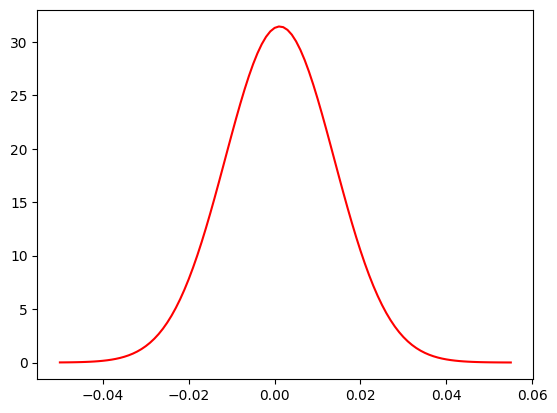

In [ ]:
# plotting the normal distribution curve
x=np.arange(-0.05,0.055,0.001)
norm_dist=norm.pdf(x,port_mean,port_std)
plt.plot(x,norm_dist, color='r')
plt.show()

In [ ]:
confidence_lvl = 0.05
var=norm.ppf(confidence_lvl,port_mean,port_std)
print(var)

-0.019684980071466258


In [ ]:
num_days=5
var*np.sqrt(num_days)

0.04929698117819529

In [ ]:
# at 95.5 cnflvl
lower=port_mean-2*port_std/np.sqrt(count)
higher=port_mean+2*port_std/np.sqrt(count)
print(lower,higher)

0.0004858316879267201 0.0026219571993342673
